Assignment 3 -- Xinyu Wang

## Re-code the titanic machine learning


### Random Choose Method to get optimal k and b


In [208]:
#Importing packages we need
import pandas as pd
import numpy as np
import requests
import re
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import icecream as ic
from PIL import Image 
import matplotlib.pyplot as plt

In [212]:
data = pd.read_csv('train.csv')

In [213]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
data.dropna(inplace = True)

In [217]:
ages = data['Age'].tolist() 
fares = data['Fare'].tolist()

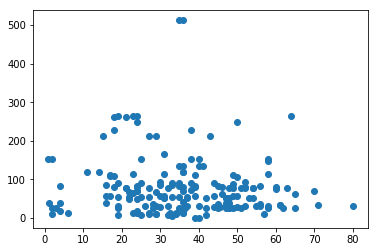

In [218]:
plt.scatter(ages,fares)

In [226]:
data_sub = data[(data['Age'] > 22) & (data['Fare'] < 400) & (data['Fare'] > 130)]

In [244]:
sub_age = data_sub['Age']

In [246]:
sub_fare = data_sub['Fare']

In [237]:
def func(age,k,b):
    return k * age + b

In [248]:
def Loss(y, yhat):
    #y: the real fares
    #yhat: the estimated fares
    #return how good is the estimated fares
    return np.mean(np.abs(y - yhat))

In [239]:
K = np.random.randint(-10, 10)

In [240]:
B = np.random.randint(-10, 10)

In [245]:
estimated_fares = func(sub_age,K,B)

In [249]:
performance = Loss(y = sub_fare, yhat = estimated_fares)

In [251]:
best_performance = float('inf')

In [263]:
best_k, best_b = None, None
min_error_rate = float('inf')

In [285]:
loop_times = 1000
while loop_times > 0:
    k_hat = np.random.randint(-10,10)
    b_hat = np.random.randint(-10,10)
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = Loss(y = sub_fare, yhat = estimated_fares)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
    loop_times -= 1
print('best k: {},best b: {}, min error rate: {}'.format(best_k, best_b, min_error_rate))

best k: 4,best b: 9, min error rate: 61.26228421052633


### Supervised Direction to get optimal k and b

In [289]:
loop_times = 10000
losses = []
best_direction = None

In [296]:
np.random.choice(change_directions)

ValueError: a must be 1-dimensional

In [292]:
change_directions = [
    #(k,b)
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)    
]

In [298]:
def step():
    return np.random.random() * 1 

In [ ]:
direction = np.random.choice(change_directions)

In [ ]:
loop_times = 10000
while loop_times > 0:
    k_delta_direction, b_delta_direction = direction 
    
    k_delta = k_delta_direction * step()
    b_delta = b_delta_direction * step()
    
    new_k = best_k + k_delta
    new_b = best_b + b_delta
    
    estimated_fares = func(sub_age, new_k, new_b)
    error_rate = Loss(y = sub_fare, yhat = estimated_fares)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = new_k, new_b
        
        direction = (k_delta_direction, b_delta_direction)
        
        print(min_error_rate)
        print('loop == {}'.format(loop_times))
        losses.append(min_error_rate)
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, min_error_rate))
    else:
        direction = np.random.choice(change_directions)
    loop_times -= 1

### Gradient Descent to get optimal k and b

In [ ]:
def step(): return random.random() * 1


direction = random.choice(change_directions)


def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])


learing_rate = 1e-1


while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))


    k_hat += k_delta
    b_hat += b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    # else:
    #     direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

    losses.append(error_rate)

    loop_times -= 1

## Answer following questions:


### Why we need machine learning methods instead of creating a complicated formula?
Ans: 当我们要拟合的数据符合的规律和模型越来越复杂，人们很难用思考来决定它的形式，就需要机器学习来帮助我们进行拟合

### Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans: 1.操作的过程很慢，方向是不确定的         2.不一定能够得到最优解

### Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Ans:Better.通过使用supervisor，降低了运行的次数。  

Advantages:运行速度更快且所需运行计算次数更少

### Why do we use Derivative / Gredient to fit a target function?
Ans:尽管supervised direction降低了运行的时间，提高了速度，在一点处损失函数变化的方向仍然是波动的，所以我们可以采用梯度下降的方法来找到最合适的点。

### In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:将损失函数求偏导数，在每一个点都会对应一个值，这个值成为函数在这一点的梯度。可以保证让损失函数向着减少的方向进行。

### What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:1.使用梯度下降，求解速度快 2.精确度更高

### Using the simple words to describe: What's the machine leanring.
Ans: 机器学习就是给出数据让机器来寻找数据符合的pattern也就是模型，我们不设限制或只做少量的限制。

## Finish the search Problem

### Step 1 and 2:
Get data from webpage and preprocessing data from page source

There are 6 metro lines in Washington DC -- Red, Blue, Yellow, Orange, Silver,and Green. And we have to deal with them seperately


In [98]:
#Try to find a pattern
url_redline = 'https://en.wikipedia.org/wiki/Red_Line_(Washington_Metro)'
response1 = requests.get(url_redline)
content1= response1.text
content1

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Red Line (Washington Metro) - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Red_Line_(Washington_Metro)","wgTitle":"Red Line (Washington Metro)","wgCurRevisionId":892966688,"wgRevisionId":892966688,"wgArticleId":559489,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Good articles","Articles using KML from Wikidata","Commons category link is on Wikidata","Red Line (Washington Metro)","Railway lines opened in 1976"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigi

In [99]:
sample1 = '<a href="/wiki/Metro_Center_station" title="Metro Center station">Metro Center</a></td>\n<td>A01'

In [100]:
#For further multiplication, we have to not only get the information of the name of the station, but its associated number
pattern1 = '<a href="/wiki/.+"\stitle="(.+\sstation)">.+</a></td>\\n<td>(\w\d+)'

In [101]:
#Test
re.findall(pattern1,sample1)

[('Metro Center station', 'A01')]

In [102]:
traffic_line1= set(re.findall(pattern1,content1))
traffic_line1

{('Bethesda station', 'A09'),
 ('Brookland–CUA station', 'B05'),
 ('Cleveland Park station', 'A05'),
 ('Dupont Circle station', 'A03'),
 ('Farragut North station', 'A02'),
 ('Forest Glen station', 'B09'),
 ('Fort Totten station', 'B06'),
 ('Friendship Heights station', 'A08'),
 ('Gallery Place station', 'B01'),
 ('Glenmont station', 'B11'),
 ('Grosvenor–Strathmore station', 'A11'),
 ('Judiciary Square station', 'B02'),
 ('Metro Center station', 'A01'),
 ('NoMa–Gallaudet U station', 'B35'),
 ('Rhode Island Avenue–Brentwood station', 'B04'),
 ('Rockville station', 'A14'),
 ('Shady Grove station', 'A15'),
 ('Takoma station', 'B07'),
 ('Tenleytown–AU station', 'A07'),
 ('Twinbrook station', 'A13'),
 ('Van Ness–UDC station', 'A06'),
 ('Wheaton station', 'B10'),
 ('White Flint station', 'A12'),
 ('Woodley Park station', 'A04')}

In [103]:
#Building a function and using a list to reserve results we get (List is better than dictionary when we want to build a relationship between stations)
def get_stations_info(url,pattern = pattern1):
    response = requests.get(url)
    content = response.text
    station = set(re.findall(pattern,content))
    station = list(station)
    #We can sort this list at this step
    station.sort(key = lambda x: x[1])
    return station

In [104]:
redline_info = get_stations_info(url_redline)
redline_info

[('Metro Center station', 'A01'),
 ('Farragut North station', 'A02'),
 ('Dupont Circle station', 'A03'),
 ('Woodley Park station', 'A04'),
 ('Cleveland Park station', 'A05'),
 ('Van Ness–UDC station', 'A06'),
 ('Tenleytown–AU station', 'A07'),
 ('Friendship Heights station', 'A08'),
 ('Bethesda station', 'A09'),
 ('Grosvenor–Strathmore station', 'A11'),
 ('White Flint station', 'A12'),
 ('Twinbrook station', 'A13'),
 ('Rockville station', 'A14'),
 ('Shady Grove station', 'A15'),
 ('Gallery Place station', 'B01'),
 ('Judiciary Square station', 'B02'),
 ('Rhode Island Avenue–Brentwood station', 'B04'),
 ('Brookland–CUA station', 'B05'),
 ('Fort Totten station', 'B06'),
 ('Takoma station', 'B07'),
 ('Forest Glen station', 'B09'),
 ('Wheaton station', 'B10'),
 ('Glenmont station', 'B11'),
 ('NoMa–Gallaudet U station', 'B35')]

In [105]:
station_relationship = {}

In [106]:
#Now we can make a function to build connections
def get_connection(line_info,dic,*str):
    for char in str:
        subset = [x for x in line_info if x[1][0] == char]
        for i in range(len(subset) - 1):
            if subset[i][0] not in dic:
                if i == 0:
                    dic[subset[i][0]] = [subset[i+1][0]]
                else:
                    dic[subset[i][0]] = [subset[i-1][0],subset[i+1][0]]
            else:
                #For stations which connect with other metro lines
                if i == 0:
                    dic[subset[i][0]].append(subset[i+1][0])
                else:
                    dic[subset[i][0]].append(subset[i-1][0])
                    dic[subset[i][0]].append(subset[i+1][0])

In [107]:
get_connection(redline_info,station_relationship,'A','B')
station_relationship

{'Metro Center station': ['Farragut North station'],
 'Farragut North station': ['Metro Center station', 'Dupont Circle station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Dupont Circle station', 'Cleveland Park station'],
 'Cleveland Park station': ['Woodley Park station', 'Van Ness–UDC station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Van Ness–UDC station',
  'Friendship Heights station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['Bethesda station', 'White Flint station'],
 'White Flint station': ['Grosvenor–Strathmore station', 'Twinbrook station'],
 'Twinbrook station': ['White Flint station', 'Rockville station'],
 'Rockville station': ['Twinbrook station', 'Shady Grove station'],
 'Gallery Place 

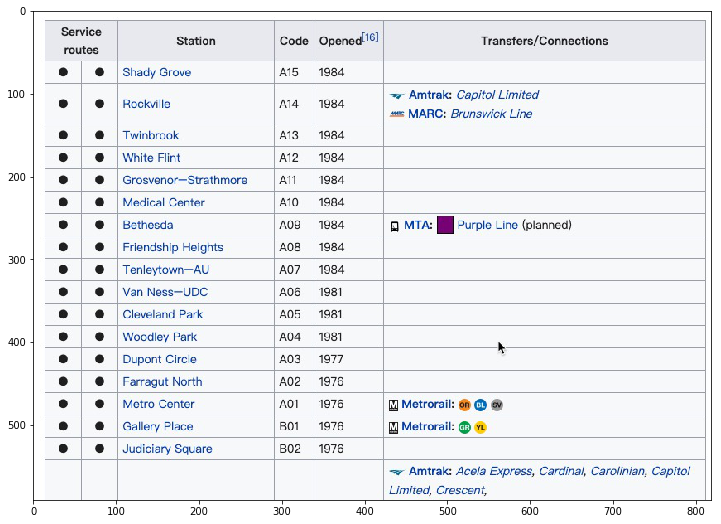

In [108]:
redline1 = Image.open('redline1.jpg')
plt.figure('redline1',figsize = (15,9))
plt.imshow(redline1)
plt.show()

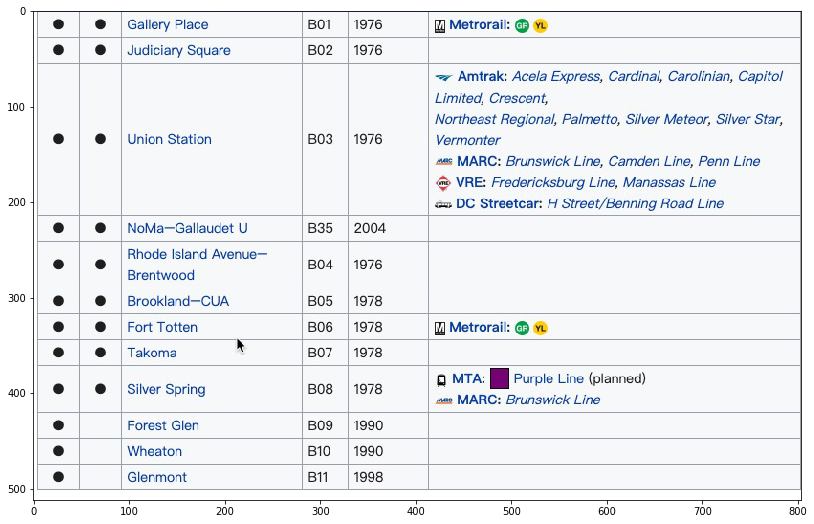

In [109]:
redline2 = Image.open('redline2.jpg')
plt.figure('redline2',figsize = (15,9))
plt.imshow(redline2)
plt.show()

We can see that we almost done our work, except two problems. 

(1)B35 station is a new station, so we have to change related value by ourself. (2) We should build connections between A01, B01, A15, B11, although we can modify our function to do this work, other lines do not have the same relationship.


So each time we used this function to get information from one line, we have to do deal with these two problems:
(a)Checking for special station which do not follow patterns we find; (b)Building connection for the beginning  and ending station.

In [110]:
station_relationship['Metro Center station'].append('Gallery Place station')
station_relationship['Gallery Place station'].append('Metro Center station')
station_relationship['Union Station'] = ['Judiciary Square station','NoMa–Gallaudet U station']
station_relationship['Judiciary Square station'].append('Union Station')
station_relationship['NoMa–Gallaudet U station'] = ['Union Station','Rhode Island Avenue–Brentwood station']
station_relationship['Shady Grove station'] = ['Rockville station']
station_relationship['Glenmont station'] = ['Wheaton station']

In [111]:
#Now we can deal with the second line -- the Blue line
url2= 'https://en.wikipedia.org/wiki/Blue_Line_(Washington_Metro)'
blue_line_info = get_stations_info(url2)
blue_line_info
#One of the station include French character which we can ignore 

[('Metro Center station', 'C01'),
 ('McPherson Square station', 'C02'),
 ('Farragut West station', 'C03'),
 ('Foggy Bottom–GWU station', 'C04'),
 ('Rosslyn station', 'C05'),
 ('Arlington Cemetery station', 'C06'),
 ('Pentagon station', 'C07'),
 ('Pentagon City station', 'C08'),
 ('Ronald Reagan Washington National Airport station', 'C10'),
 ('Potomac Yard station', 'C11'),
 ('Braddock Road station', 'C12'),
 ('King Street–Old Town station', 'C13'),
 ('Federal Triangle station', 'D01'),
 ('Smithsonian station', 'D02'),
 ('L&#39;Enfant Plaza station', 'D03'),
 ('Federal Center SW station', 'D04'),
 ('Capitol South station', 'D05'),
 ('Eastern Market station', 'D06'),
 ('Potomac Avenue station', 'D07'),
 ('Stadium–Armory station', 'D08'),
 ('Benning Road station', 'G01'),
 ('Capitol Heights station', 'G02'),
 ('Addison Road station', 'G03'),
 ('Morgan Boulevard station', 'G04'),
 ('Largo Town Center station', 'G05'),
 ('Van Dorn Street station', 'J02'),
 ('Franconia–Springfield station', 

In [112]:
get_connection(blue_line_info,station_relationship,'C','D','G','J')
station_relationship

{'Metro Center station': ['Farragut North station',
  'Gallery Place station',
  'McPherson Square station'],
 'Farragut North station': ['Metro Center station', 'Dupont Circle station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Dupont Circle station', 'Cleveland Park station'],
 'Cleveland Park station': ['Woodley Park station', 'Van Ness–UDC station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Van Ness–UDC station',
  'Friendship Heights station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['Bethesda station', 'White Flint station'],
 'White Flint station': ['Grosvenor–Strathmore station', 'Twinbrook station'],
 'Twinbrook station': ['White Flint station', 'Rockville station'],
 'Rockville station': ['Twi

In [113]:
#As we said before, we have to deal with some beginning and ending problems:
station_relationship['Franconia–Springfield station'] = ['Van Dorn Street station']
station_relationship['Van Dorn Street station'].append('King Street–Old Town station')
station_relationship['King Street–Old Town station'] = ['Van Dorn Street station', 'Braddock Road station']
station_relationship['Metro Center station'].append('Federal Triangle station')
station_relationship['Federal Triangle station'].append('Metro Center station')
station_relationship['Largo Town Center station'] = ['Morgan Boulevard station']

In [114]:
#Now we can deal with the third line -- the Yellow line
url3= 'https://en.wikipedia.org/wiki/Yellow_Line_(Washington_Metro)'
yellow_line_info = get_stations_info(url3)
yellow_line_info

[('Pentagon station', 'C07'),
 ('Pentagon City station', 'C08'),
 ('Ronald Reagan Washington National Airport station', 'C10'),
 ('Potomac Yard station', 'C11'),
 ('Braddock Road station', 'C12'),
 ('King Street – Old Town station', 'C13'),
 ('Eisenhower Avenue station', 'C14'),
 ('Mount Vernon Square station', 'E01'),
 ('Shaw–Howard University station', 'E02'),
 ('U Street station', 'E03'),
 ('Columbia Heights station', 'E04'),
 ('Georgia Avenue–Petworth station', 'E05'),
 ('Fort Totten station', 'E06'),
 ('Gallery Place station', 'F01'),
 ('Archives station', 'F02'),
 ('L&#39;Enfant Plaza station', 'F03')]

In [115]:
get_connection(yellow_line_info,station_relationship,'C','E','F')
station_relationship

{'Metro Center station': ['Farragut North station',
  'Gallery Place station',
  'McPherson Square station',
  'Federal Triangle station'],
 'Farragut North station': ['Metro Center station', 'Dupont Circle station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Dupont Circle station', 'Cleveland Park station'],
 'Cleveland Park station': ['Woodley Park station', 'Van Ness–UDC station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Van Ness–UDC station',
  'Friendship Heights station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['Bethesda station', 'White Flint station'],
 'White Flint station': ['Grosvenor–Strathmore station', 'Twinbrook station'],
 'Twinbrook station': ['White Flint station', 'Rockville station'

In [116]:
#Adding connections like before
station_relationship['Huntington station'] = ['Eisenhower Avenue station']
station_relationship['Eisenhower Avenue station'] = ['Huntington station', 'King Street – Old Town station']
station_relationship['Pentagon station'].append('L&#39;Enfant Plaza station')
station_relationship['L&#39;Enfant Plaza station'].append('Pentagon station')
station_relationship['L&#39;Enfant Plaza station'].append('Archives station')
station_relationship['Gallery Place station'].append('Mount Vernon Square station')
station_relationship['Mount Vernon Square station'].append('Gallery Place station')
station_relationship['Fort Totten station'].append('Georgia Avenue–Petworth station')

In [117]:
#Get the result of the fourth line -- the Orange line
url4= 'https://en.wikipedia.org/wiki/Orange_Line_(Washington_Metro)'
orange_line_info = get_stations_info(url4)
orange_line_info

[('Metro Center station', 'C01'),
 ('McPherson Square station', 'C02'),
 ('Farragut West station', 'C03'),
 ('Foggy Bottom–GWU station', 'C04'),
 ('Rosslyn station', 'C05'),
 ('Federal Triangle station', 'D01'),
 ('Smithsonian station', 'D02'),
 ('L&#39;Enfant Plaza station', 'D03'),
 ('Federal Center SW station', 'D04'),
 ('Capitol South station', 'D05'),
 ('Eastern Market station', 'D06'),
 ('Potomac Avenue station', 'D07'),
 ('Stadium–Armory station', 'D08'),
 ('Minnesota Avenue station', 'D09'),
 ('Deanwood station', 'D10'),
 ('Cheverly station', 'D11'),
 ('Landover station', 'D12'),
 ('New Carrollton station', 'D13'),
 ('Court House station', 'K01'),
 ('Clarendon station', 'K02'),
 ('Virginia Square–GMU station', 'K03'),
 ('Ballston–MU station', 'K04'),
 ('East Falls Church station', 'K05'),
 ('West Falls Church station', 'K06'),
 ('Dunn Loring station', 'K07')]

In [118]:
get_connection(orange_line_info,station_relationship,'C','D','K')
station_relationship

{'Metro Center station': ['Farragut North station',
  'Gallery Place station',
  'McPherson Square station',
  'Federal Triangle station',
  'McPherson Square station'],
 'Farragut North station': ['Metro Center station', 'Dupont Circle station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Dupont Circle station', 'Cleveland Park station'],
 'Cleveland Park station': ['Woodley Park station', 'Van Ness–UDC station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Van Ness–UDC station',
  'Friendship Heights station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['Bethesda station', 'White Flint station'],
 'White Flint station': ['Grosvenor–Strathmore station', 'Twinbrook station'],
 'Twinbrook station': ['White Flint

In [119]:
#Adding connections 
station_relationship['Vienna station'] = ['Dunn Loring station']
station_relationship['Dunn Loring station'] = ['Vienna station','West Falls Church station']
station_relationship['Court House station'].append('Rosslyn station')
station_relationship['Rosslyn station'].append('Court House station')
station_relationship['Rosslyn station'].append('Foggy Bottom–GWU station')
station_relationship['Metro Center station'].append('Federal Triangle station')
station_relationship['Federal Triangle station'].append('Metro Center station')
station_relationship['New Carrollton station'] = ['Landover station']

In [120]:
#Get the result of the fifth line -- the Silver line
url5= 'https://en.wikipedia.org/wiki/Silver_Line_(Washington_Metro)'
silver_line_info = get_stations_info(url5)
silver_line_info

[('Metro Center station', 'C01'),
 ('McPherson Square station', 'C02'),
 ('Farragut West station', 'C03'),
 ('Foggy Bottom–GWU station', 'C04'),
 ('Rosslyn station', 'C05'),
 ('Federal Triangle station', 'D01'),
 ('Smithsonian station', 'D02'),
 ('L&#39;Enfant Plaza station', 'D03'),
 ('Federal Center SW station', 'D04'),
 ('Capitol South station', 'D05'),
 ('Eastern Market station', 'D06'),
 ('Potomac Avenue station', 'D07'),
 ('Benning Road station', 'G01'),
 ('Capitol Heights station', 'G02'),
 ('Addison Road station', 'G03'),
 ('Morgan Boulevard station', 'G04'),
 ('Largo Town Center station', 'G05'),
 ('Court House station', 'K01'),
 ('Clarendon station', 'K02'),
 ('Virginia Square–GMU station', 'K03'),
 ('Ballston–MU station', 'K04'),
 ('East Falls Church station', 'K05'),
 ('McLean station', 'N01'),
 ('Tysons Corner station', 'N02'),
 ('Spring Hill station', 'N04'),
 ('Wiehle–Reston East station', 'N06'),
 ('Reston Town Center station', 'N07'),
 ('Herndon station', 'N08'),
 ('In

In [121]:
get_connection(silver_line_info,station_relationship,'C','D','G','K','N')
station_relationship

{'Metro Center station': ['Farragut North station',
  'Gallery Place station',
  'McPherson Square station',
  'Federal Triangle station',
  'McPherson Square station',
  'Federal Triangle station',
  'McPherson Square station'],
 'Farragut North station': ['Metro Center station', 'Dupont Circle station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Dupont Circle station', 'Cleveland Park station'],
 'Cleveland Park station': ['Woodley Park station', 'Van Ness–UDC station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Van Ness–UDC station',
  'Friendship Heights station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['Bethesda station', 'White Flint station'],
 'White Flint station': ['Grosvenor–Strathmore station

In [122]:
#Adding connections TAT
station_relationship['Ashburn station'] = ['Loudoun Gateway station']
station_relationship['Loudoun Gateway'] = ['Ashburn station', 'Dulles International Airport station']
station_relationship['McLean station'].append('East Falls Church station')
station_relationship['East Falls Church station'].append('McLean station')
station_relationship['Court House station'].append('Rosslyn station')
station_relationship['Rosslyn station'].append('Court House station')
station_relationship['Stadium–Armory station'].append('Benning Road station')
station_relationship['Benning Road station'].append('Stadium–Armory station')
station_relationship['Largo Town Center station'].append('Morgan Boulevard station')

In [123]:
#Get the result of the sixth line -- the Green line
url6= 'https://en.wikipedia.org/wiki/Green_Line_(Washington_Metro)'
green_line_info = get_stations_info(url6)
green_line_info

[('Mount Vernon Square station', 'E01'),
 ('Shaw–Howard University station', 'E02'),
 ('U Street station', 'E03'),
 ('Columbia Heights station', 'E04'),
 ('Georgia Avenue–Petworth station', 'E05'),
 ('Fort Totten station', 'E06'),
 ('West Hyattsville station', 'E07'),
 ('Prince George&#39;s Plaza station', 'E08'),
 ('College Park–University of Maryland station', 'E09'),
 ('Greenbelt station', 'E10'),
 ('Gallery Place station', 'F01'),
 ('Archives station', 'F02'),
 ('L&#39;Enfant Plaza station', 'F03'),
 ('Navy Yard–Ballpark station', 'F05'),
 ('Anacostia station', 'F06'),
 ('Congress Heights station', 'F07'),
 ('Southern Avenue station', 'F08'),
 ('Naylor Road station', 'F09'),
 ('Suitland station', 'F10'),
 ('Branch Avenue station', 'F11')]

In [124]:
get_connection(green_line_info,station_relationship,'E','F')

In [125]:
#Last adding
station_relationship['Branch Avenue station'] = ['Suitland station']
station_relationship['Suitland station'].append('Branch Avenue station')
station_relationship['Suitland station'].append('Naylor Road station')
station_relationship['Gallery Place station'].append('Mount Vernon Square station')
station_relationship['Mount Vernon Square station'].append('Gallery Place station')
station_relationship['Greenbelt'] = ['College Park–University of Maryland station']
station_relationship['College Park–University of Maryland station'].append('Greenbelt')

In [126]:
#Dealing with duplicates values
for key in station_relationship:
    station_relationship[key] = list(set(station_relationship[key]))

In [127]:
station_relationship

{'Metro Center station': ['McPherson Square station',
  'Farragut North station',
  'Federal Triangle station',
  'Gallery Place station'],
 'Farragut North station': ['Dupont Circle station', 'Metro Center station'],
 'Dupont Circle station': ['Farragut North station', 'Woodley Park station'],
 'Woodley Park station': ['Cleveland Park station', 'Dupont Circle station'],
 'Cleveland Park station': ['Van Ness–UDC station', 'Woodley Park station'],
 'Van Ness–UDC station': ['Cleveland Park station', 'Tenleytown–AU station'],
 'Tenleytown–AU station': ['Friendship Heights station',
  'Van Ness–UDC station'],
 'Friendship Heights station': ['Tenleytown–AU station', 'Bethesda station'],
 'Bethesda station': ['Friendship Heights station',
  'Grosvenor–Strathmore station'],
 'Grosvenor–Strathmore station': ['White Flint station', 'Bethesda station'],
 'White Flint station': ['Twinbrook station', 'Grosvenor–Strathmore station'],
 'Twinbrook station': ['Rockville station', 'White Flint station'

In [132]:
#checking for some busy stations 
station_relationship['Metro Center station']

['McPherson Square station',
 'Farragut North station',
 'Federal Triangle station',
 'Gallery Place station']

In [129]:
graph = station_relationship

In [130]:
g = nx.Graph(graph)

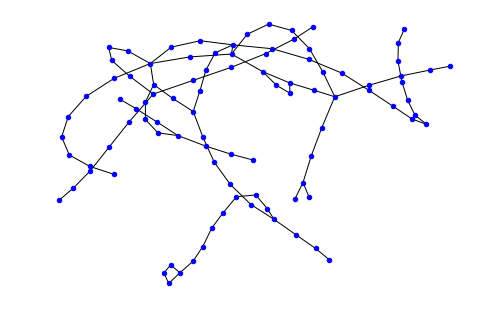

In [143]:
nx.draw(g, node_size=20, node_color='blue')

### Building the search agent

In [152]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [187]:
### Build the search agent
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen:
            continue
        successors = graph[frontier]
        
        for station in successors:
            if station:
                if station in path:
                    continue
                new_path = path + [station]
                pathes.append(new_path)
            
                if is_goal(new_path):
                    return new_path
        seen.add(frontier)
        pathes = search_strategy(pathes)
    

### Create different policies for transfer system

In [188]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [189]:
search(station_relationship, start = 'Pentagon City station', 
       is_goal=is_goal('Foggy Bottom–GWU station'), search_strategy = lambda x: x)

['Pentagon City station',
 'Pentagon station',
 'Arlington Cemetery station',
 'Rosslyn station',
 'Foggy Bottom–GWU station']

In [190]:
def get_as_much_station(path):
    return -1 * len(path)

In [191]:
def get_total_station(path):
    return len(path)

In [192]:
search(station_relationship, start = 'Rosslyn station', 
       is_goal=is_goal('Fort Totten station'), search_strategy = lambda x : x )

['Rosslyn station',
 'Arlington Cemetery station',
 'Pentagon station',
 'L&#39;Enfant Plaza station',
 'Archives station',
 'Gallery Place station',
 'Judiciary Square station',
 'Rhode Island Avenue–Brentwood station',
 'Brookland–CUA station',
 'Fort Totten station']

In [193]:
search(station_relationship, start = 'Rosslyn station', 
       is_goal=is_goal('Fort Totten station'), search_strategy = sort_path(get_total_station, beam = 100))

['Rosslyn station',
 'Arlington Cemetery station',
 'Pentagon station',
 'L&#39;Enfant Plaza station',
 'Archives station',
 'Gallery Place station',
 'Judiciary Square station',
 'Rhode Island Avenue–Brentwood station',
 'Brookland–CUA station',
 'Fort Totten station']

In [194]:
search(station_relationship, start = 'Rosslyn station', 
       is_goal=is_goal('Fort Totten station'), search_strategy = sort_path(get_as_much_station, beam = 100))

['Rosslyn station',
 'Arlington Cemetery station',
 'Pentagon station',
 'L&#39;Enfant Plaza station',
 'Archives station',
 'Gallery Place station',
 'Mount Vernon Square station',
 'Shaw–Howard University station',
 'U Street station',
 'Columbia Heights station',
 'Georgia Avenue–Petworth station',
 'Fort Totten station']

In [200]:
search(station_relationship, start = 'Mount Vernon Square station', 
       is_goal=is_goal('Stadium–Armory station'), search_strategy = sort_path(get_total_station, beam = 100))

['Mount Vernon Square station',
 'Gallery Place station',
 'Archives station',
 'L&#39;Enfant Plaza station',
 'Federal Center SW station',
 'Capitol South station',
 'Eastern Market station',
 'Potomac Avenue station',
 'Stadium–Armory station']

In [201]:
search(station_relationship, start = 'Mount Vernon Square station', 
       is_goal=is_goal('Stadium–Armory station'), search_strategy = sort_path(get_as_much_station, beam = 100))

['Mount Vernon Square station',
 'Shaw–Howard University station',
 'U Street station',
 'Columbia Heights station',
 'Georgia Avenue–Petworth station',
 'Fort Totten station',
 'Brookland–CUA station',
 'Rhode Island Avenue–Brentwood station',
 'Judiciary Square station',
 'Gallery Place station',
 'Archives station',
 'L&#39;Enfant Plaza station',
 'Federal Center SW station',
 'Capitol South station',
 'Eastern Market station',
 'Potomac Avenue station',
 'Stadium–Armory station']

###  Test your result with commercial applications

和给出的结果还是有一些不同，一个是因为没有各个地铁站的位置，因此无法计算距离，所以可能在换乘的方案选择上存在一些不同